<a href="https://colab.research.google.com/github/SamPetkov/PartialCoalescence/blob/main/GridLevelDroplet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Constants + variables

In [2]:
#Constants
sigma12 = 22e-3
rho_l = 786.

D = 1.07e-3

TAU = np.sqrt((rho_l*D**(3))/(sigma12))
V = np.pi/6

#Results
grids = np.array([10,11,12,13])
t_pinch_off_D = np.array([0.584,0.558,0.551,0.551])
t_pinch_off_R = t_pinch_off_D*np.pow(2,3/2)
t_pinch_off_SI = t_pinch_off_D*TAU
V_daughter = np.array([0.0990877,0.109328,0.103866,0.105545])
# Note - for gird level 10 we fractional pixels have a substantial effect on the volume calculaed
R_daughter_frame = np.array([0.694,0.697,0.690,0.680])
R_daughter = np.cbrt(V_daughter/V)

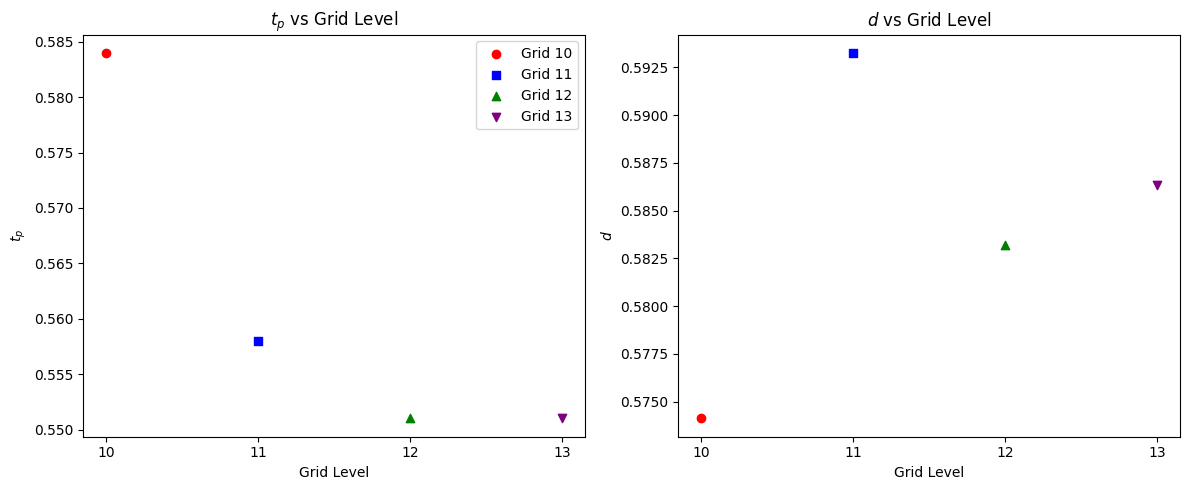

In [7]:
# prompt: create a graph of $t_p$ ( t_pinch_off_D) depending on the grid level( grids) and $d$ ( R_daughter) depending on the grid level( grids) to the right of the first plot and make each point have a unique color and shape that march for both plots for a given element of grids

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', '^', 'v']

for i in range(len(grids)):
  ax1.scatter(grids[i], t_pinch_off_D[i], color=colors[i], marker=markers[i], label=f'Grid {grids[i]}')
  ax2.scatter(grids[i], R_daughter[i], color=colors[i], marker=markers[i])

ax1.set_xlabel('Grid Level')
ax1.set_ylabel('$t_p$')
ax1.set_title('$t_p$ vs Grid Level')
ax1.set_xticks(grids)
ax1.legend()

ax2.set_xlabel('Grid Level')
ax2.set_ylabel('$d$')
ax2.set_title('$d$ vs Grid Level')
ax2.set_xticks(grids)

plt.tight_layout()
plt.show()


In [3]:
print(R_daughter )
print(t_pinch_off_R)
print(t_pinch_off_SI)

[0.57412577 0.5932589  0.58320995 0.58633571]
[1.65180144 1.57826234 1.55846335 1.55846335]
[0.00386357 0.00369156 0.00364525 0.00364525]


In [5]:
error_from_frame_selection = 0.001/(np.sqrt(3)*0.551)

Interface generator



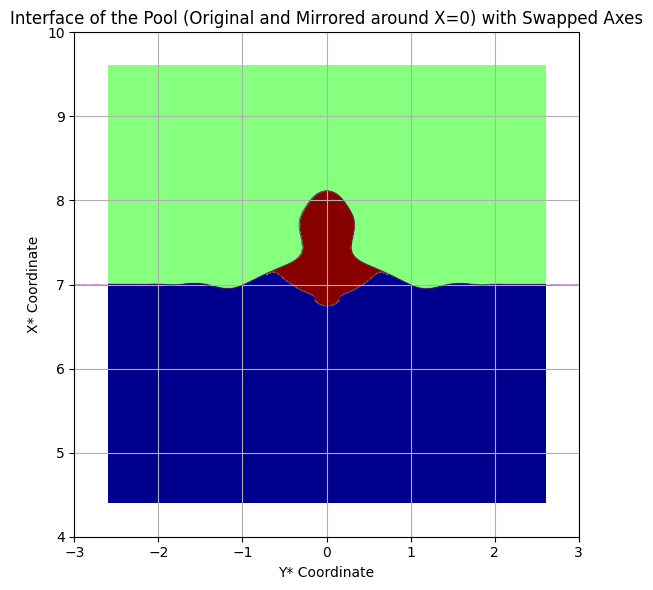

In [ ]:
file_path = '/content/INterface/10/drop_t_00.354.dat'  # your file location
background_image = '/content/INterface/10/time-00.354.png' # your image location

# Read the file and extract segments
segments = []
current_segment = []

with open(file_path, 'r') as file:
    for line in file:
        stripped = line.strip()
        if not stripped:
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            try:
                x, y = map(float, stripped.split())
                current_segment.append((x, y))
            except ValueError:
                continue

# Append the last segment if it exists
if current_segment:
    segments.append(current_segment)

# Plot the segments
plt.figure(figsize=(8, 6))
for segment in segments:
    xs, ys = zip(*segment)
    # Plot original segment with swapped x and y
    plt.plot(ys, xs, color='purple', linewidth=.25)

    # Mirror the y-coordinates around x=0 (which are now the new x-coordinates)
    # and plot the mirrored segment with swapped x and y
    ys_mirrored = [-y for y in ys]
    plt.plot(ys_mirrored, xs, color='purple', linewidth=.25)


# Load and display the original background image
img = plt.imread(background_image)
plt.imshow(img, zorder=0, extent=[-2.6, 2.6, 4.4, 9.6])

plt.title("Interface of the Pool (Original and Mirrored around X=0) with Swapped Axes")
plt.xlabel("Y* Coordinate") # Swapped axis label
plt.ylabel("X* Coordinate") # Swapped axis label
plt.grid(True)
#plt.axis("equal")
plt.xlim(-3, 3)  # Set x-axis limits
plt.ylim(4, 10)  # Set y-axis limits
plt.tight_layout()

plt.show()

In [ ]:
file_path = '/content/INterface/10/drop_t_00.354.dat'  # your file location
background_image = '/content/INterface/10/time-00.354.png' # your image location

# Read the file and extract segments
segments = []
current_segment = []

with open(file_path, 'r') as file:
    for line in file:
        stripped = line.strip()
        if not stripped:
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            try:
                x, y = map(float, stripped.split())
                current_segment.append((x, y))
            except ValueError:
                continue

# Append the last segment if it exists
if current_segment:
    segments.append(current_segment)

# Plot the segments
plt.figure(figsize=(8, 6))
for segment in segments:
    xs, ys = zip(*segment)
    # Plot original segment with swapped x and y
    plt.plot(ys, xs, color='purple', linewidth=.25)

    # Mirror the y-coordinates around x=0 (which are now the new x-coordinates)
    # and plot the mirrored segment with swapped x and y
    ys_mirrored = [-y for y in ys]
    plt.plot(ys_mirrored, xs, color='purple', linewidth=.25)


# Load and display the original background image
img = plt.imread(background_image)
plt.imshow(img, zorder=0, extent=[-2.6, 2.6, 4.4, 9.6])

plt.title("Interface of the Pool (Original and Mirrored around X=0) with Swapped Axes")
plt.xlabel("Y* Coordinate") # Swapped axis label
plt.ylabel("X* Coordinate") # Swapped axis label
plt.grid(True)
#plt.axis("equal")
plt.xlim(-3, 3)  # Set x-axis limits
plt.ylim(4, 10)  # Set y-axis limits
plt.tight_layout()

plt.show()